## End-to-End Deep Learning για Αυτοκινούμενα Οχήματα
#### ΝΙΚΟΛΑΟΣ ΓΙΑΝΝΟΠΟΥΛΟΣ ΑΜ:18389140

#### **Φόρτωση απαραίτητων βιβλιοθηκών**

In [1]:
import pandas as pd
import cv2
import ntpath
import numpy as np
import matplotlib.pyplot as plt
import keras

from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, Flatten, Dense
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

#### **Εισαγωγή και μελέτη των δεδομένων**

In [2]:
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']

In [3]:
data = pd.read_csv('carSimFinal/driving_log.csv',names = columns) 

#### Αποκοπή ονόματος αρχείου από το path

In [4]:
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2022_02_22_01_50_59_516.jpg,left_2022_02_22_01_50_59_516.jpg,right_2022_02_22_01_50_59_516.jpg,0.000000,0.4,0.0,8.910915
1,center_2022_02_22_01_50_59_585.jpg,left_2022_02_22_01_50_59_585.jpg,right_2022_02_22_01_50_59_585.jpg,0.000000,0.4,0.0,9.145716
2,center_2022_02_22_01_50_59_665.jpg,left_2022_02_22_01_50_59_665.jpg,right_2022_02_22_01_50_59_665.jpg,-0.286385,0.4,0.0,9.432838
3,center_2022_02_22_01_50_59_743.jpg,left_2022_02_22_01_50_59_743.jpg,right_2022_02_22_01_50_59_743.jpg,-0.600939,0.4,0.0,9.631796
4,center_2022_02_22_01_50_59_819.jpg,left_2022_02_22_01_50_59_819.jpg,right_2022_02_22_01_50_59_819.jpg,-0.610329,0.4,0.0,9.895606


In [5]:
print(data.iloc[954])

center      center_2022_02_22_01_52_14_619.jpg
left          left_2022_02_22_01_52_14_619.jpg
right        right_2022_02_22_01_52_14_619.jpg
steering                             0.0892019
throttle                                   0.4
reverse                                      0
speed                                   30.037
Name: 954, dtype: object


In [6]:
data = pd.read_csv('carSimFinal/driving_log.csv',names = columns) 

160 320 3


Text(0.5, 1.0, 'Left Camera')

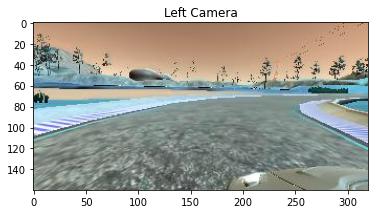

In [7]:
img=data['left'][954]
arxiki=cv2.imread(img)
height, width, channels = arxiki.shape
print(height, width, channels)
plt.imshow(arxiki)
plt.title('Left Camera')

160 320 3


Text(0.5, 1.0, 'Central Camera')

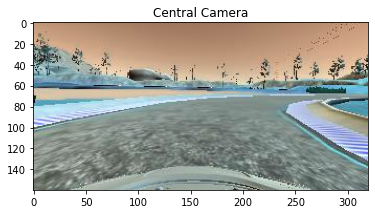

In [8]:
img=data['center'][954]
arxiki=cv2.imread(img)
height, width, channels = arxiki.shape
print(height, width, channels)
plt.imshow(arxiki)
plt.title('Central Camera')

#### Χωρισμός των εικόνων και των γωνιών

Εκτιμήθηκε περίπου 0.25 απόκλιση των εικόνων της δεξία και αριστερής κάμερας σε σχέση με την κεντρική, οπότε και μεταβάλλουμε τις αντίστοιχες γωνίες καθώς ο εξομοιωτής προβλέπει χρησιμοποιώντας μόνο την κεντρική κάμερα.

In [9]:
X_front=data['center']
yf=data['steering']

X_left=data['left']
yl=data['steering'] + 0.25

X_right=data['right']
yr=data['steering'] - 0.25

In [10]:
X_front.shape

(9280,)

#### Προεπεξεργασία των εικόνων

Οι εικόνες αρχικά κόβονται έτσι ώστε να φένεται μόνο ο δρόμος και όχι το αυτοκίνητο ούτε ο ουρανός, στη συνέχεια αλλάζει το colorspace από BGR σε YUV, θολώνει, τροποπούνται οι διαστάσεις τις και τέλος κανονικοποήται.

In [11]:
def proepexergasia_eikonas(eikona):
    eikona=cv2.imread(eikona)
    eikona=eikona[60:135,:,:]
    eikona=cv2.cvtColor(eikona,cv2.COLOR_BGR2YUV)
    eikona=cv2.GaussianBlur(eikona,(5,5),0)
    eikona=cv2.resize(eikona,(200,66))
    eikona=eikona/255
    return eikona

In [12]:
Xf=np.array(list(map(proepexergasia_eikonas,X_front)))
Xl=np.array(list(map(proepexergasia_eikonas,X_left)))
Xr=np.array(list(map(proepexergasia_eikonas,X_right)))

In [13]:
Xf.shape

(9280, 66, 200, 3)

In [14]:
# merged images from all cameras
X=np.concatenate((Xf, Xl, Xr), axis=0)
y=np.concatenate((yf, yl, yr), axis=0)

In [15]:
X.shape

(27840, 66, 200, 3)

In [16]:
# To free RAM
Xf=None
Xl=None
Xr=None

#### Χωρισμός των δεδομένων σε εκπαίδευσης και δοκιμής

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True,random_state=19)

In [18]:
# To free RAM
X=None
y=None

(22272, 66, 200, 3)

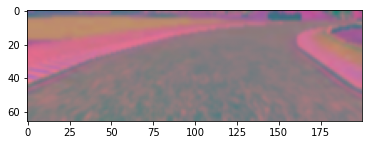

In [19]:
plt.imshow(X_train[8])
X_train.shape

(5568, 66, 200, 3)

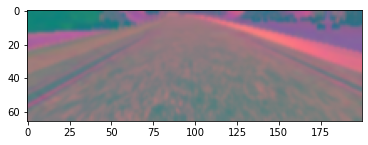

In [20]:
plt.imshow(X_test[8])
X_test.shape

Χρησιμοποιήθηκαν 22272 εικόνες για την εκπαίδευση του μοντέλου και 5568 για τον έλεγχο εγκυρότητας του.

### **Δημιουργία μοντέλου παλινδρόμησης με νευρωνικά δίκτυα**

Δημιουργούμε ένα συνελικτικό μοντέλο νευρωνικού δικτύου με την χρήση της Tensorflow, keras.
<br> 
**Conv2D**: Συνελικτικά layers
<br>
**kernel_size**: μέγεθος φίλτρου
<br>
**strides**: βήμα φίλτρου
<br>
**activation**: ενεργοποίηση με την συνάρτηση elu
<br>
**kernel_regularizer**: Αυξάνουν το σφάλμα στην γενική συνάρτηση απώλειας που χρησιμοποιήται για την βελτίωση του μοντέλου(loss = l2 * reduce_sum(square(x)))
<br>
**Flatten**: ισοπέδωση των layers
<br>
**Dense**: πλήρως συνδεδεμένα layers

In [21]:
model = keras.Sequential()

model.add(Conv2D(24, kernel_size=(5,5), strides=(2,2), activation='elu', kernel_regularizer=l2(0.001),input_shape=(66,200,3)))
model.add(Conv2D(36, kernel_size=(5,5), strides=(2,2), activation='elu', kernel_regularizer=l2(0.001)))
model.add(Conv2D(48, kernel_size=(5,5), strides=(2,2), activation='elu', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, kernel_size=(3,3), activation='elu', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, kernel_size=(3,3), activation='elu', kernel_regularizer=l2(0.001)))
  
model.add(Flatten())
model.add(Dense(100, activation='elu', kernel_regularizer=l2(0.001))) 
     
model.add(Dense(50, activation='elu', kernel_regularizer=l2(0.001)))

model.add(Dense(10, activation ='elu', kernel_regularizer=l2(0.001)))
model.add(Dense(1))

# Source: https://github.com/jeremy-shannon/CarND-Behavioral-Cloning-Project/blob/576d11371ebf47986fccefe54fba658dbe38b70c/model.py#L120

<br>

**Περίληψη της αρχιτεκτονικής του μοντέλου και αριθμός παραμέτρων**

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               1

Στην μεταγλώτιση του μοντέλου προστίθεται συνάρτηση απώλειας **mse**(Mean squared error) η οποία μετρά πόσο ακριβές είναι το μοντέλο κατά τη διάρκεια της εκπαίδευσης και χρησιμοποιείται για την εύρεση των «καλύτερων» παραμέτρων για το μοντέλο και o βελτιστοποιητής **Adam** ο οποίος βρίσκει τις βέλτιστες τιμές των βαρών του Νευρωνικού δικτύου με βάση τα δεδομένα που βλέπει και ελαχιστοποιώντας τη Συνάρτηση Απώλειας.

In [23]:
model.compile(loss='mse', optimizer=Adam(learning_rate=1e-4))

Στο μοντέλο επίσης χρησιμοποιήθηκε η τεχνική του Early Stopping η οποία στην συγκεκριμένη περίπτωση ελέγχει κάθε φορά το validation loss και αν το μοντέλο δεν βελτιωθεί για συνολικά 10 epochs(petience= 10) τότε σταματάει την μάθηση.

Ακόμα προστίθεται και Model Checkpoint το οποίο αποθηκεύει όλα τα μοντέλα για τα epochs τα οποία είχαν βελτίωση.

In [24]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
checkpoint = keras.callbacks.ModelCheckpoint(filepath='bestModels/model.{epoch:02d}-{val_loss:.5f}.h5',monitor='val_loss', save_best_only=True, mode='min')
my_callbacks=[early_stop,checkpoint]

EPOCHS = 30

In [25]:
history=model.fit(X_train, y_train, batch_size=32, validation_data=(X_test,y_test),
                    epochs=EPOCHS,
                    verbose=1,
                    shuffle=1,
                    callbacks=[my_callbacks])

Epoch 1/30
696/696 [==============================] - 179s 253ms/step - loss: 0.4260 - val_loss: 0.3479
Epoch 2/30
696/696 [==============================] - 179s 258ms/step - loss: 0.2882 - val_loss: 0.2340
Epoch 3/30
696/696 [==============================] - 168s 242ms/step - loss: 0.1933 - val_loss: 0.1564
Epoch 4/30
696/696 [==============================] - 163s 235ms/step - loss: 0.1297 - val_loss: 0.1072
Epoch 5/30
696/696 [==============================] - 167s 240ms/step - loss: 0.0890 - val_loss: 0.0747
Epoch 6/30
696/696 [==============================] - 167s 240ms/step - loss: 0.0640 - val_loss: 0.0550
Epoch 7/30
696/696 [==============================] - 175s 251ms/step - loss: 0.0493 - val_loss: 0.0444
Epoch 8/30
696/696 [==============================] - 160s 230ms/step - loss: 0.0409 - val_loss: 0.0383
Epoch 9/30
696/696 [==============================] - 164s 236ms/step - loss: 0.0361 - val_loss: 0.0349
Epoch 10/30
696/696 [==============================] - 162s 233m

### **Αξιολόγηση επίδοσης μοντέλου**

Text(0.5, 0, 'Epoch')

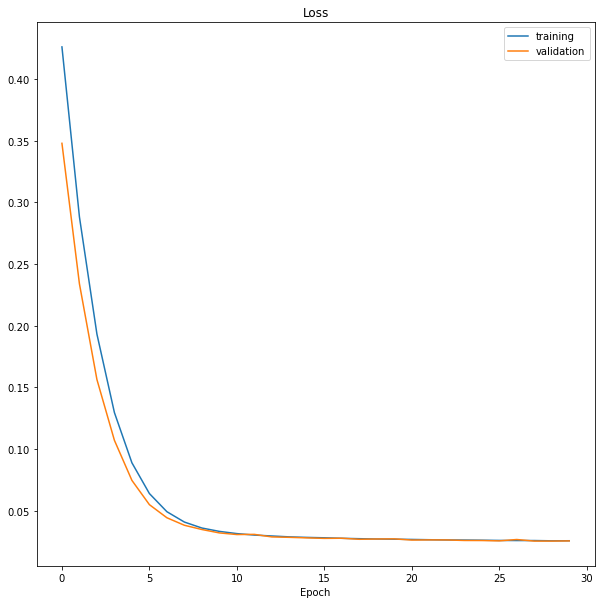

In [26]:
fig=plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

#### **Πιθανές Βελτιώσεις**
Αύξηση των δειγμάτων χρήση της τεχνικής του **Augmentation** των ήδη υπάρχων δειγμάτων, όπου οι εικόνες τροποποιούνται με διάφορες τεχνικες. Για αυτόν τον σκοπό μπορεί να χρησιμοποιηθεί το ImageDataGenerator το οποίο παρέχεται από το keras και μπορούμε εύκολα να του δώσουμε να κάνει διάφορες τροποποιήσεις. Αλλά το παρόν μοντέλο απαιτεί επεξεργασία των γωνιών στριψίματος, για παράδειγμα στην περίπτωση της περιστροφής της εικόνας οι γωνίες πρέπει να γίνουν αντίθετες, το οποίο δεν μπορεί να επιτευχθεί απλά με την χρήση του ImageDataGenerator.